## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

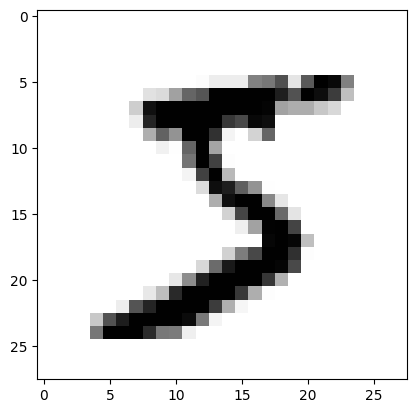

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## Simple densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 3ms/step - loss: 0.2619 - accuracy: 0.9231
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1071 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0522 - accuracy: 0.9840
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9883


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 80ms/step


array([1.7069247e-07, 3.0831249e-09, 7.9083547e-06, 1.5067487e-04,
       4.5979578e-11, 7.3762138e-08, 1.4133252e-12, 9.9983621e-01,
       1.5311400e-07, 4.7630324e-06], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.9998362

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new (test) data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0694 - accuracy: 0.9768
test_acc: 0.9768000245094299


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[ 0.03587952 -0.00362469  0.02091341 ... -0.00901843  0.01362648
   0.00875164]
 [-0.0147942  -0.02194086  0.0590809  ... -0.04883853  0.06384765
  -0.02655179]
 [-0.06337323  0.02399576 -0.04203157 ...  0.01991557 -0.04318376
   0.03430109]
 ...
 [-0.0521175  -0.01573206  0.0460867  ... -0.02402354 -0.00543524
   0.00348108]
 [-0.06510957  0.02349769 -0.0244628  ...  0.02149772 -0.01598698
   0.05155427]
 [-0.02014465 -0.04020101  0.02088866 ... -0.06003716  0.05068101
  -0.04586726]]
[ 8.89288541e-03 -4.42157201e-02  4.88767251e-02  1.20507441e-02
 -4.48934687e-03 -1.55019416e-02 -1.78101957e-02 -6.81556538e-02
  3.22814286e-02 -6.63735718e-02  5.31691220e-03 -5.24854958e-02
  3.17891911e-02 -7.07996935e-02  6.41133487e-02 -6.11342769e-03
 -1.45729864e-02 -1.06952647e-02  1.05693191e-03 -5.63536491e-03
 -3.70364562e-02  4.37656492e-02 -3.59745063e-02  7.42084160e-03
  5.71650034e-03  6.33335337e-02  5.57270572e-02  3.65501121e-02
  3.79367657e-02  1.16163576e-02 -1.16813667e-02 -1.3

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## Initializing random weights and creating NN with those weights

In [21]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

input = 28*28
hidden = 512
output = 10

In [22]:
size = input*hidden + hidden + hidden*output + output
size

407050

In [23]:
random_weights = np.random.rand(size)
random_weights

array([0.37454012, 0.95071431, 0.73199394, ..., 0.83274859, 0.66486982,
       0.5787854 ])

In [24]:
weights_1 = random_weights[:input*hidden].reshape(input, hidden)
biases_1 = random_weights[input*hidden:input*hidden+hidden].reshape(hidden,)
weights_2 = random_weights[input*hidden+hidden:input*hidden+hidden+hidden*output].reshape(hidden, output)
biases_2 = random_weights[input*hidden+hidden+hidden*output:].reshape(output,)

weights_list = [weights_1, biases_1, weights_2, biases_2]

# Print the shapes of the weight arrays
for weights in weights_list:
    print(weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [25]:
# Defining the architecture of a neural network
new_network = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

In [26]:
# Setting the weights of the model 
new_network.set_weights(weights_list)

# Compiling the model 
new_network.compile(loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

In [27]:
new_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Evaluating the model on train data
train_loss, train_acc = new_network.evaluate(train_images, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 795.9622 - accuracy: 0.0904


In [29]:
# Evaluating the model on new (test) data
test_loss, test_acc = new_network.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 805.0311 - accuracy: 0.0892
test_acc: 0.08919999748468399
